### Contents

[Imports](#Imports)

[bottom](#bottom)

### Imports

In [7]:
from IPython.display import display, clear_output
!pip install orjson furl fabulous
!pip install --upgrade protobuf
!pip install --upgrade grpcio qdrant-client
clear_output()

In [ ]:
# import os
# import sys
# os.environ['PYTHONPATH'] = "/content/drive/MyDrive/colab_venv3.10.12/lib/python3.10/site-packages"
# os.execv("/content/drive/MyDrive/colab_venv3.10.12/bin/python", ['python'] + sys.argv)
# sys.path.append('/content/drive/MyDrive/colab_venv3.10.12/lib/python3.10/site-packages')
# sys.path.insert(0, '/content/drive/MyDrive/wb_parsing/')

In [180]:
%load_ext autoreload
%autoreload 2

In [1]:
# Подключение данных гугл диска
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -r /content/drive/MyDrive/wb_parsing/requirements.txt
!pip install furl
!pip install orjson
# !pip install --upgrade protobuf
!pip install --upgrade grpcio qdrant-client

In [ ]:
# from pyngrok import ngrok

# # Open a tunnel to VS Code on port 10000
# public_url = ngrok.connect(10000)
# print(f"VS Code Server is available on {public_url}")

# from colabcode import ColabCode

# # Start the VS Code server on port 10000
# ColabCode(port=10000)


In [8]:
import os
from os.path import join as pjoin
import sys
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent))
import json
import orjson
import itertools
from pprint import pprint
from datetime import datetime, date, timedelta
import requests
import random
import time
from pprint import pprint
import json

import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from fabulous import color as fb_color
from PIL import Image
from io import BytesIO
%matplotlib inline

from IPython.display import display, clear_output

In [18]:
# ROOT_PATH = str(Path(os.getcwd()).parent)
ROOT_PATH = '/content/drive/MyDrive/wb_parsing/'

In [10]:
sys.path.insert(0, '/content/drive/MyDrive/wb_parsing/')

In [12]:
from src.parse_utils import (
    get_catalog,
    find_card_url,
    get_images_urls_from_card_url
)
from src.utils import (
    get_uniq_items_with_images,
    show_items_images
)
from src.ml.utils import (
    # VectorIndex,
    ImageEncoder
)
from src.vis_utils import plot_image_with_mask
image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')

initializing ImageEncoder...
ok


In [13]:
matplotlib.rcParams['figure.figsize'] = (7, 7)
sns.set_style('whitegrid')

---

- facebook/sam-vit-huge

    unsupervised image segmentation by masks

- google/owlvit-base-patch32

    zero-shot image segmentation by boxes

- timm/eva_large_patch14_196.in22k_ft_in22k_in1k

    Image encoder


In [153]:
catalog = get_catalog()
# pprint(catalog[:1])

[{'id': 1234, 'name': 'Сертификаты Wildberries', 'url': '/gift/certificates'}]


In [19]:
all_urls = json.load(open(
    pjoin(ROOT_PATH, 'data/raw_data/all_urls_from_tmux.json')
))
print(f"{len(all_urls):,}")
print(f"{len([category_info for category_info in all_urls if category_info.get('products') is not None]):,}")

2,398
2,264


In [155]:
idxs = [idx for idx, category in enumerate(all_urls) if 'costumes' in str(category.get('shard'))]
# idxs
# [category for idx, category in enumerate(all_urls) if idx in idxs][:1]

In [21]:
import requests
from PIL import Image
import torch

from transformers import OwlViTProcessor, OwlViTForObjectDetection

owl_processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
owl_model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

In [99]:
url = (
    # "http://images.cocodataset.org/val2017/000000039769.jpg"
    "https://github.com/user-attachments/assets/3f794b46-e2ed-4de3-9e8e-5105cdbf76b7"
    # "https://github.com/user-attachments/assets/2c44b262-ed71-4dda-8e11-c9909b41bf29"
)
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

texts = [['pants', 'jeans', 'leggings', 'shorts', 'sweatpants', 'skirt', 'joggers', 'sweater', 't-shirt', 'sweatshirt', 'hoodie', 'dragon', 'dinosaur', 'helloween costume', 'dinasour costume',
'jacket', 'dress', 'romper', 'vest', 'cardigan', 'underwear', 'boxer', 'bra', 'pajamas', 'swimsuit',
'bralette', 'bikini', 'thong', 'slippers','sandal', 'boots', 'sneakers', 'shoes', 'cap', 'sunglasses', 'polo',
'jeggings', 'jogger', 'trouser', 'short', 'pajama', 'cami', 'tank', 'blouse', 'sandal', 'slipper', 'boots'
'skort', 'bracelet', 'earrings', 'necklace', 'beanie', 'hat', 'bikini top', 'bikini bottom', 'bag']]

with torch.no_grad():
    inputs = owl_processor(text=texts, images=image, return_tensors="pt")
    outputs = owl_model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    results = owl_processor.post_process_object_detection(outputs=outputs, threshold=0.015, target_sizes=target_sizes)

text = texts[0]
boxes, scores, labels = results[0]["boxes"], results[0]["scores"], results[0]["labels"]

res = []
for box, score, label in zip(boxes, scores, labels):
    box = tuple([int(i) for i in box.tolist()])
    res.append((text[label], round(score.item(), 3), box))

res.sort(key=lambda x: x[1], reverse=True)
res

[('sweater', 0.063, (14, 39, 394, 484)),
 ('helloween costume', 0.061, (4, 0, 454, 898)),
 ('jeggings', 0.06, (88, 410, 455, 893)),
 ('helloween costume', 0.057, (2, 15, 436, 890)),
 ('helloween costume', 0.044, (2, 40, 451, 893)),
 ('slipper', 0.04, (421, 814, 454, 863)),
 ('slipper', 0.036, (389, 843, 451, 899)),
 ('cardigan', 0.03, (6, 56, 384, 630)),
 ('hoodie', 0.029, (3, 1, 375, 491)),
 ('jeggings', 0.028, (179, 429, 455, 892)),
 ('slipper', 0.028, (276, 778, 407, 900)),
 ('pajama', 0.021, (-2, 772, 232, 899)),
 ('beanie', 0.02, (133, 1, 308, 166)),
 ('sweater', 0.019, (18, 36, 383, 450)),
 ('sandal', 0.019, (378, 738, 455, 862)),
 ('sunglasses', 0.018, (158, 2, 284, 57)),
 ('jeggings', 0.017, (113, 464, 404, 899))]

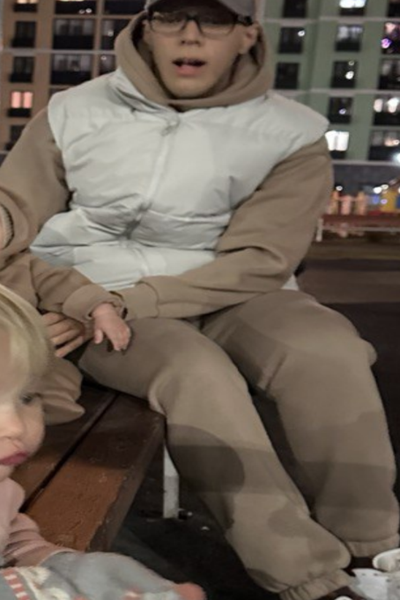

In [100]:
image.resize((400, 600))

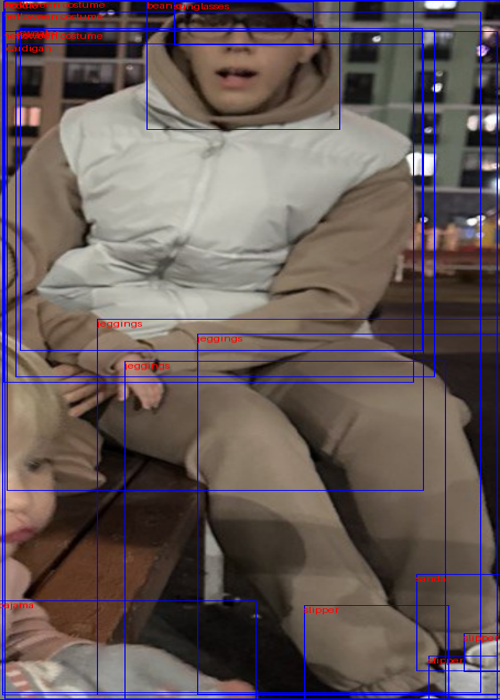

In [101]:
from PIL import Image, ImageDraw

draw = ImageDraw.Draw(image)

for type_, score, box in res:
    draw.rectangle(box, outline="blue", width=1)
    draw.text(box[:2], text=type_, fill='red', size=35)
    # Show the image with the drawn bounding box
image.resize((500, 700))

In [28]:
from transformers import pipeline


sam_mname = 'facebook/sam-vit-huge'
# sam_mname = 'facebook/sam-vit-base'
# sam_generator =  pipeline("mask-generation", model=sam_mname, device = 0, points_per_batch = 4)  # cuda
sam_generator =  pipeline("mask-generation", model=sam_mname, device = -1, points_per_batch = 4)  # nocuda

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [152]:
%%time
url = (
    # "http://images.cocodataset.org/val2017/000000039769.jpg"
    "https://github.com/user-attachments/assets/3f794b46-e2ed-4de3-9e8e-5105cdbf76b7"
    # "https://github.com/user-attachments/assets/2c44b262-ed71-4dda-8e11-c9909b41bf29"
)
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")


outputs = sam_generator(image, points_per_batch = 4)
res = sorted(outputs["masks"], key=lambda x: x.sum(), reverse=True)
res[:1]

CPU times: user 5min 30s, sys: 21 s, total: 5min 51s
Wall time: 1min


[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])]

100%|██████████| 16/16 [00:00<00:00, 72.67it/s]


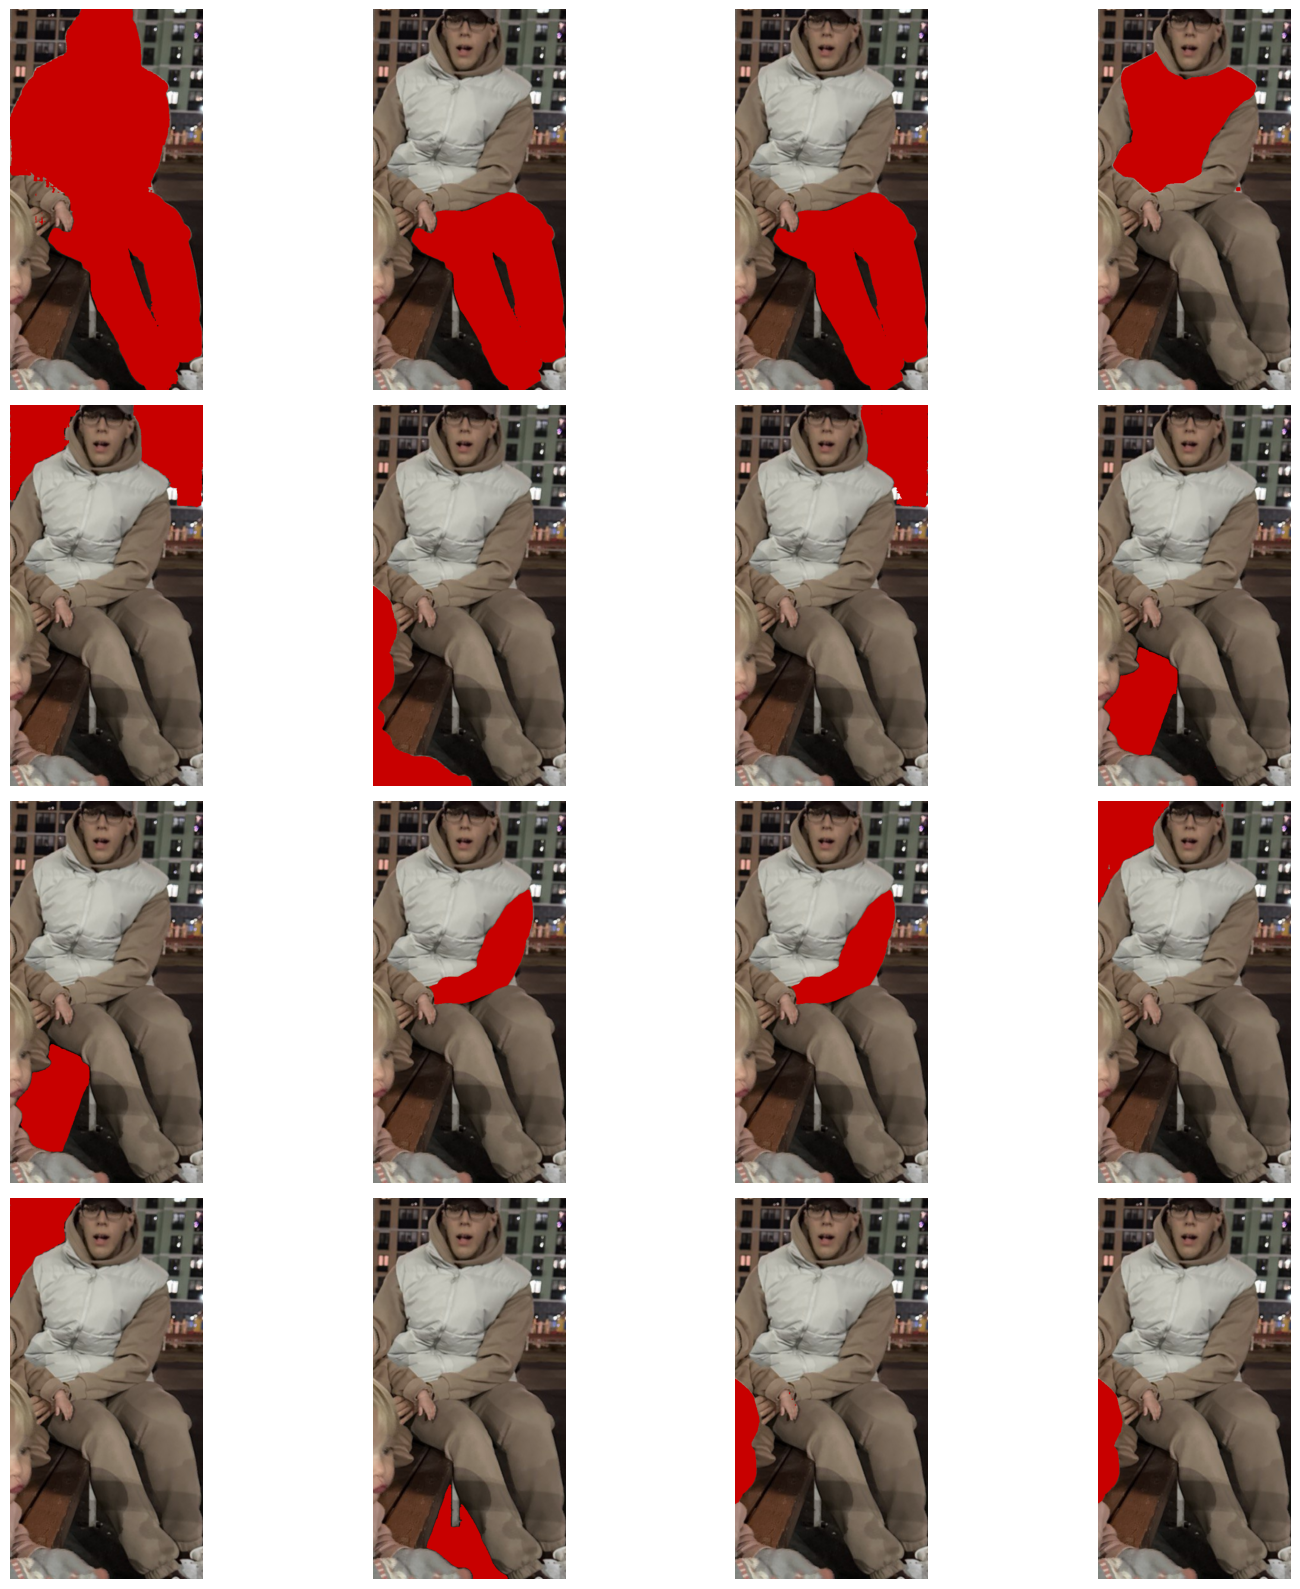

In [104]:
import typing as t

def get_row_col_number(idx: int, nrows: int, ncols: int) -> t.Tuple[int, int]:
  row_idx, col_idx = 0, 0
  row_idx = idx // ncols
  col_idx = idx % ncols
  return row_idx, col_idx

ncols = 3
nrows = len(res) // ncols if len(res) % ncols == 0 else (len(res) // ncols) + 1

nrows, ncols = 4, 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))

for mask_idx in tqdm(range(min(len(res), 16))):
  row, col = get_row_col_number(idx=mask_idx, nrows=nrows, ncols=ncols)
  plot_image_with_mask(
    image=image,
    mask=res[mask_idx],
    fig=fig,
    ax=ax[row, col],
  );
fig.tight_layout();

In [194]:
# from src.ml.utils import ImageEncoder
image_encoder = ImageEncoder(device=get_device())
image_encoder

initializing ImageEncoder on device=cuda...
ok


In [195]:
images_urls = [image_url for item_info in list(all_urls[2]['products'].values())[:10] for image_url in item_info['item_images_urls']][:128]
print(f"len(images_urls): {len(images_urls):,}")
images_embs = image_encoder.encode_batch(
    images_urls=images_urls,
    verbose=True
)
print(f"images_embs: {images_embs.shape[0]:,} x {images_embs.shape[1]:,}")

len(images_urls): 128


batching images: 100%|██████████| 128/128 [01:46<00:00,  1.21it/s]
/usr/local/lib/python3.10/dist-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


images_embs: 128 x 768


### bottom